# Building an Image Enhancer using Fourier Transform
In this project, students are expected to explore the Fourier Transform to enhance the image such as blurring, sharpening, edge detection, noise suppression, etc.

Students are required to build the enhancer module using Fourier Transform with the following functionality:
1.	Blurring using low-pass filter
2.	Sharpening using high pass filter
3.	Edge Detection
4.	Noise suppression

Students are required to create a python class, and can implement these functionalities as different methods.

Steps that can be followed ( Please note these are only recommended steps, students are free to use other steps) :
1.	Convert Image from spatial domain to frequency domain
2.	Apply appropriate filter/processing on frequency domain to achieve the task.
3.	Convert back to the spatial domain from the frequency domain.
4.	Apply the required post-processing to improve the results.

### But, What is Fourier Transform really ?
In the simplest terms, a fourier transform helps in breaking down a incoming signal into its building blocks. So for example consider a signal f(x) having made by superimposing two or more sinusoidal functions with different frequencies. Now by just looking at the plot of f(x) you wont be able to decide what or how many original functions were used to form f(x).

This is where Fourier does its magic. By passing f(x) through fourier transformer, we get a new function F(x). What's sweet about F(x) is that it a plot of frequencies that made f(x) originally. So just by looking at F(x) you can tell what original frequencies were that were used to form f(x). In doing so Fourier transform can reveal important characteristics of a signal, namely, its frequency components.

## Using Fast Fourier Transformation

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt,exp
from skimage import io

## 1. Effect of Blurring Using Low Pass Filter

Low pass filter is a filter that only allow low frequencies to pass through. Low frequencies in images mean pixel values that are changing slowly. For example, smooth area with slightly color changing in the image such as the center of new blank white paper is considered as a low frequency content.

Since the output of low pass filter only allow low frequencies to pass through, the high frequencies contents such as noises are blocked which make processed image has less noisy pixels. Therefore, low pass filter is highly used to remove the noises in images.

#### Take the image as input

In [4]:
img = cv2.imread('clown.jpeg',0)

#### Create functions for calculating distance between points and Low Pass filter, then use them with different intensities on the image

In [5]:
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

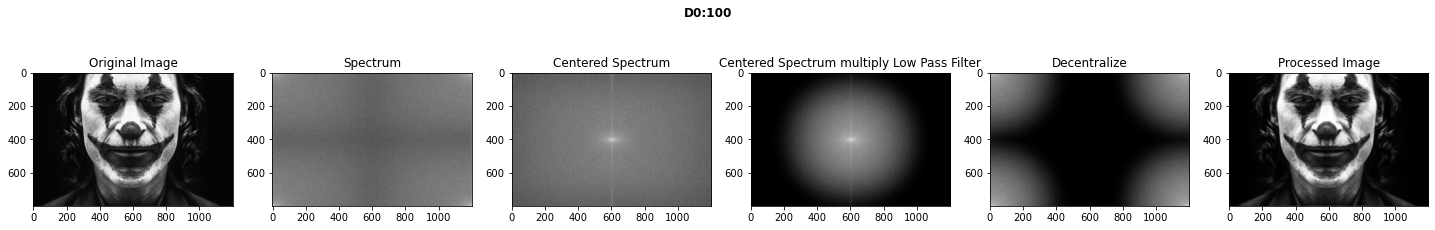

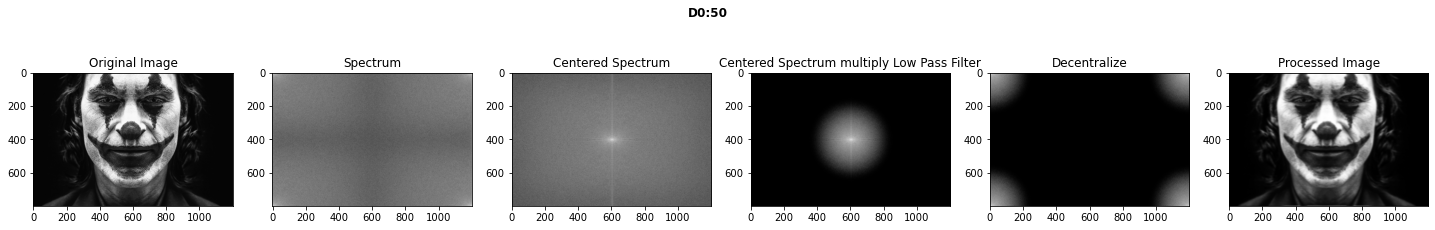

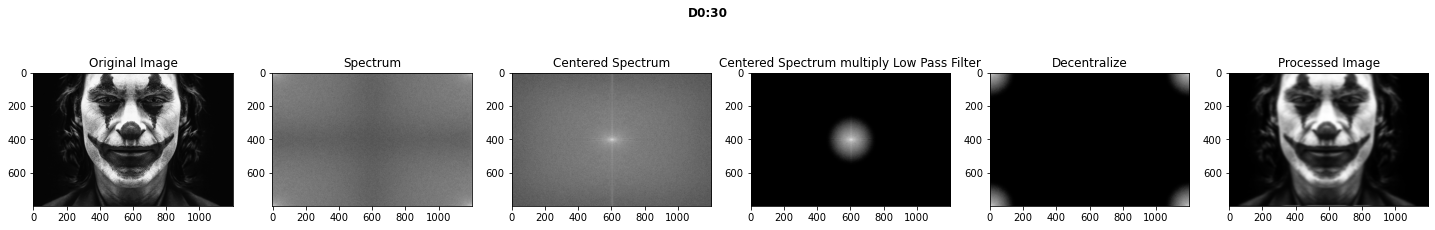

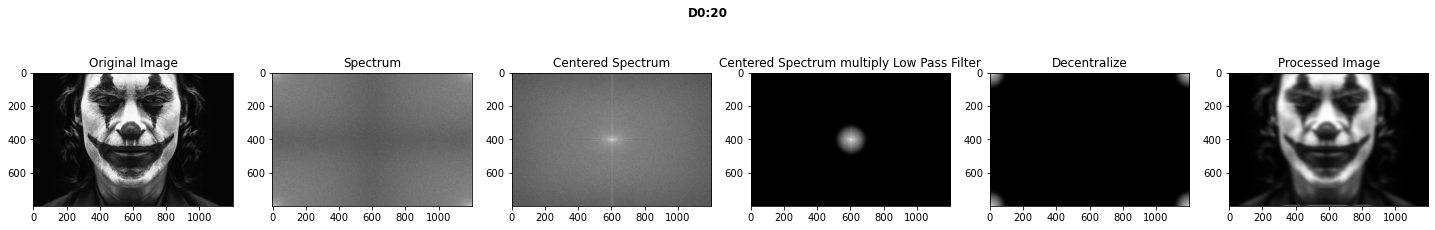

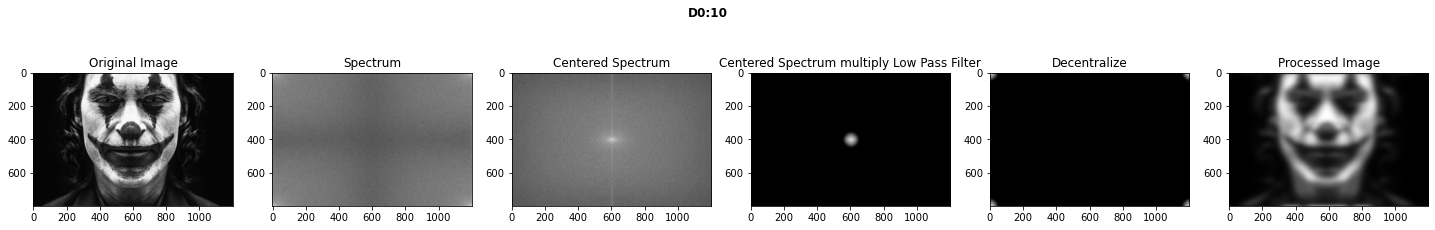

In [6]:
def try_d0s_lp(d0):
    plt.figure(figsize=(25, 5), constrained_layout=False)


    plt.subplot(161), plt.imshow(img, "gray"), plt.title("Original Image")

    original = np.fft.fft2(img)
    plt.subplot(162), plt.imshow(np.log(1+np.abs(original)), "gray"), plt.title("Spectrum")

    center = np.fft.fftshift(original)
    plt.subplot(163), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Centered Spectrum")

    LowPassCenter = center * gaussianLP(d0,img.shape)
    plt.subplot(164), plt.imshow(np.log(1+np.abs(LowPassCenter)), "gray"), plt.title("Centered Spectrum multiply Low Pass Filter")

    LowPass = np.fft.ifftshift(LowPassCenter)
    plt.subplot(165), plt.imshow(np.log(1+np.abs(LowPass)), "gray"), plt.title("Decentralize")

    inverse_LowPass = np.fft.ifft2(LowPass)
    plt.subplot(166), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Processed Image")

    plt.suptitle("D0:"+str(d0),fontweight="bold")
    plt.subplots_adjust(top=1.1)
    plt.show()
    
    
for i in [100,50,30,20,10]:
    try_d0s_lp(i)

## 2. Compare the effect of the main high-pass filters (edge detection)

High Pass filter, on the contrary, is a filter that only allow high frequencies to pass through. High frequencies in images mean pixel values that are changing dramatically. For example, Edge areas in the image with huge color changing such as the edge between two overlap white and black paper is consider as the high frequency content.

In [7]:
def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

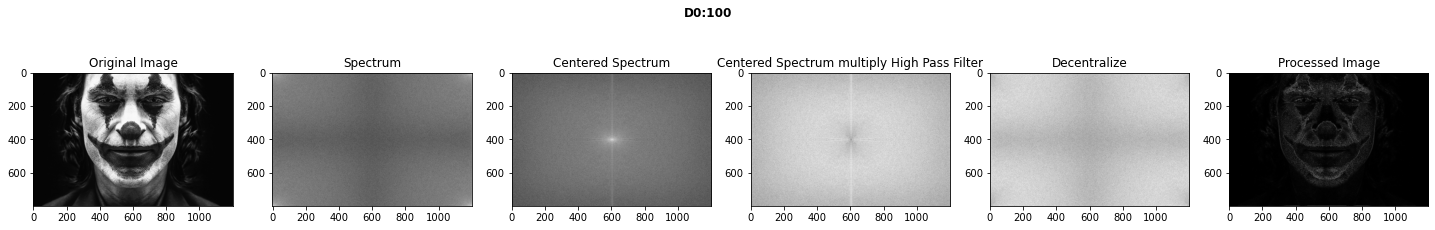

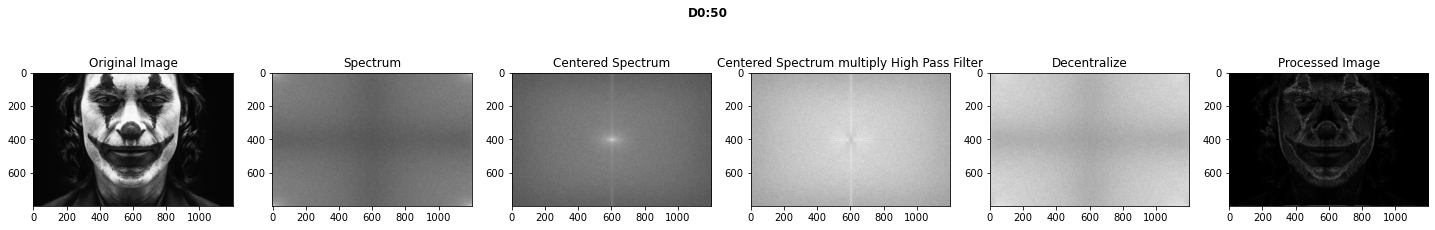

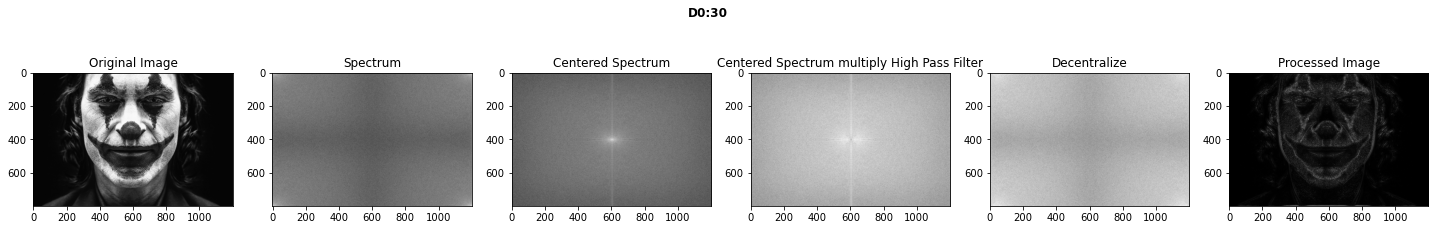

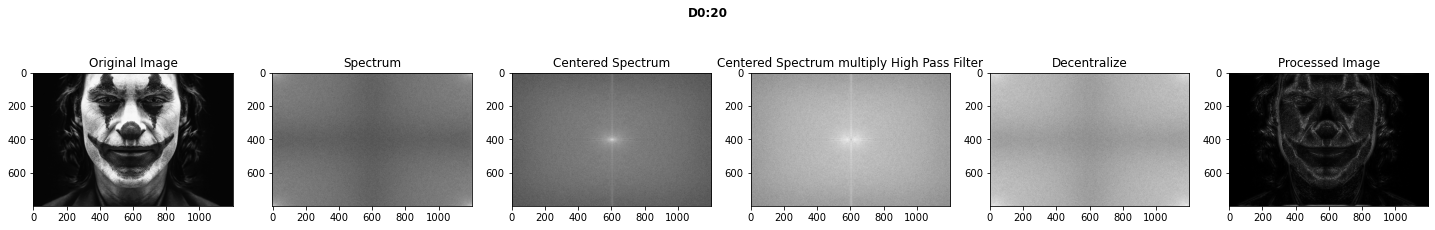

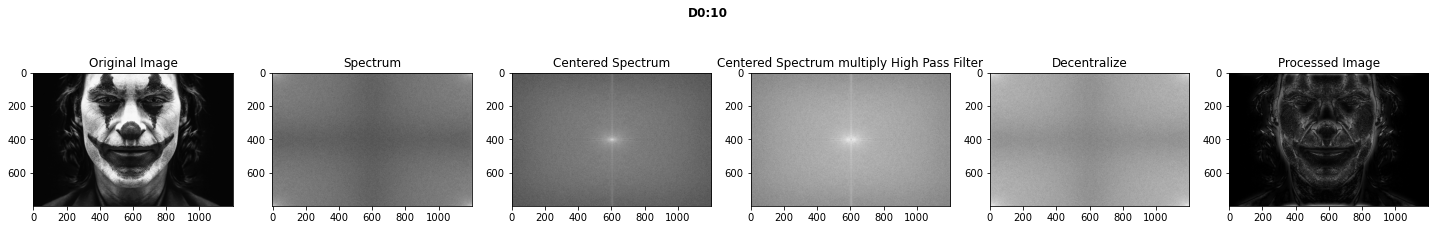

In [8]:
def try_hp(d0):
    plt.figure(figsize=(25, 5), constrained_layout=False)


    plt.subplot(161), plt.imshow(img, "gray"), plt.title("Original Image")

    original = np.fft.fft2(img)
    plt.subplot(162), plt.imshow(np.log(1+np.abs(original)), "gray"), plt.title("Spectrum")

    center = np.fft.fftshift(original)
    plt.subplot(163), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Centered Spectrum")

    HighPassCenter = center * gaussianHP(d0,img.shape)
    plt.subplot(164), plt.imshow(np.log(1+np.abs(HighPassCenter)), "gray"), plt.title("Centered Spectrum multiply High Pass Filter")

    HighPass = np.fft.ifftshift(HighPassCenter)
    plt.subplot(165), plt.imshow(np.log(1+np.abs(HighPass)), "gray"), plt.title("Decentralize")

    inverse_HighPass = np.fft.ifft2(HighPass)
    plt.subplot(166), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Processed Image")

    plt.suptitle("D0:"+str(d0),fontweight="bold")
    plt.subplots_adjust(top=1.1)
    plt.show()
    
    
for i in [100,50,30,20,10]:
    try_hp(i)

## 3. Image Sharpening in frequency domain

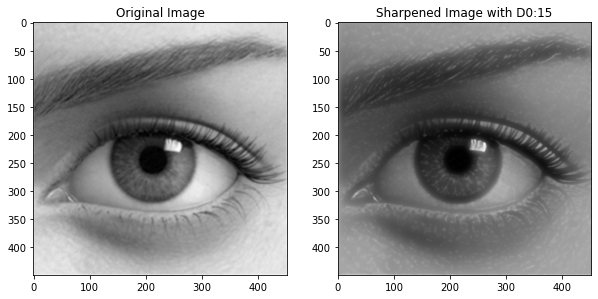

In [12]:
d0 = 15

img = cv2.imread('image_sharpen.jpeg', 0)

def image_sharpen(input_img):
    # perform FFT
    original = np.fft.fft2(img)
    # get spectrum
    center = np.fft.fftshift(original)
    # center spectrum for high pass
    HighPassCenter = center * gaussianHP(d0,img.shape)
    # perform high pass
    HighPass = np.fft.ifftshift(HighPassCenter)
    # reverse FFT -> IFFT
    inverse_HighPass = np.fft.ifft2(HighPass)
    # add filter to original image
    sharpened = img+np.abs(inverse_HighPass)
    
    return sharpened


plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(img, "gray")
plt.title("Original Image")

plt.subplot(122)
sharpened_img = image_sharpen(img)
plt.imshow(sharpened_img,cmap="gray")
plt.title("Sharpened Image with D0:"+str(d0))
plt.show()

## 4. Noise Suppression

(Text(0.5, 1.0, 'After FFT'), ([], []), ([], []))

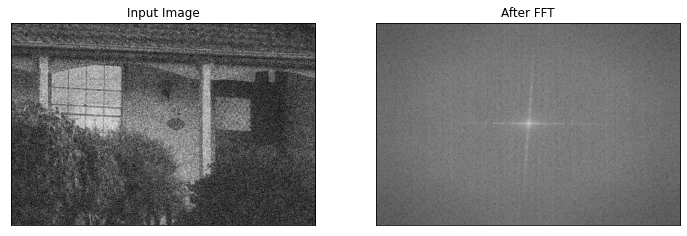

In [13]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('image.jpeg', 0)
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

plt.figure(figsize=(4*3, 4.8*5), constrained_layout=False)
plt.subplot(221), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('After FFT'), plt.xticks([]), plt.yticks([])

/var/folders/8r/jjs1zg7938x9bj7_lcjvjt000000gn/T/ipykernel_20711/2959112609.py:24: RuntimeWarning: divide by zero encountered in log
  fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))


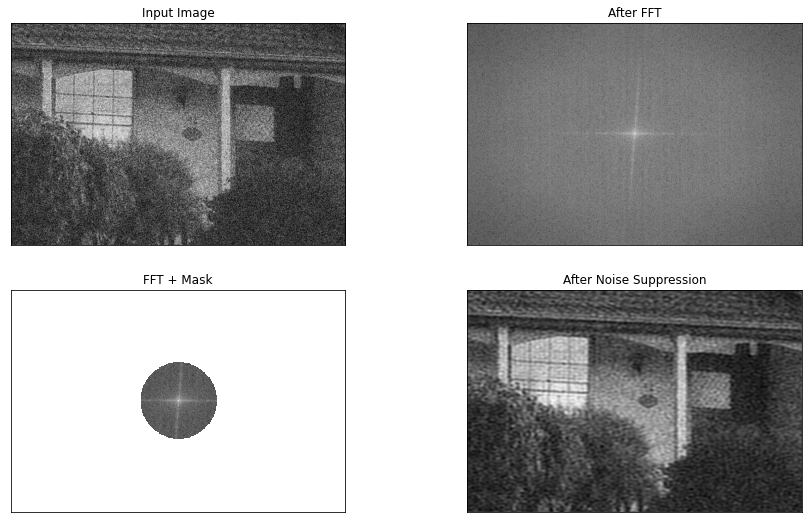

In [15]:
def noise_suppression(input_img):
    dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)

    magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

    rows, cols = img.shape
    crow, ccol = int(rows / 2), int(cols / 2)  # center

    # Circular LPF mask, center circle is 1, remaining all zeros
    rows, cols = img.shape
    crow, ccol = int(rows / 2), int(cols / 2)

    mask = np.zeros((rows, cols, 2), np.uint8)
    r = 70
    center = [crow, ccol]
    x, y = np.ogrid[:rows, :cols]
    mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
    mask[mask_area] = 1

    # apply mask and inverse DFT
    fshift = dft_shift * mask

    fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))

    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

noise_suppression(img)    
plt.figure(figsize=(5*3, 3*3), constrained_layout=False)
plt.subplot(221), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('After FFT'), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(fshift_mask_mag, cmap='gray')
plt.title('FFT + Mask'), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(img_back, cmap='gray')
plt.title('After Noise Suppression'), plt.xticks([]), plt.yticks([])
plt.show()